# Исследование продаж и оценок игр разных жанров и платформ

В нашем распоряжении имеются исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы из открытых источников. Перед нами данные до 2016 года. Нам нужно выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина "Стримчик" в 2017 году.

В ходе работы будут выполнены следующие шаги:

1. Изучение общей информации по данным при их открытии
2. Подготовка данных, в том числе:
    * замена названий столбцов
    * выявление дубликатов
    * преобразование данных в нужные типы
    * обработка пропусков
    * подсчет суммарных продаж во всех регионах
3. Исследовательский анализ данных, в том числе будут изучены:
    * количество выпущенных игр в разные годы
    * изменение продаж по платформам
    * актуальный период для прогноза на 2017 год и неактуальные годы
    * лидеры продаж (роста или падения) среди платформ
    * глобальные продажи игр в разбивке по платформам
    * влияние отзывов покупателей и критиков на продажи внутри одной популярной платформы
    * выводы по продажам на других платформах
    * распределение игр по жанрам
4. Составление портрета пользователя каждого региона, в том числе:
    * топ-5 популярных платформ
    * топ-5 популярных жанров
    * влияние рейтинга ESRB на продажи (в отдельном регионе)
5. Проверка гипотез, в том числе:
    * средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    * средние пользовательские рейтинги жанров Action и Sports разные
6. Составление общего вывода.

## Открытие файла с данными и изучение общей информации

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
path='C:\\Users\\admin_Egor\\Documents\\Yandex Practicum\\project_games\\games_data.csv'
try:
    data = pd.read_csv(path, sep='\\t', decimal='.', engine='python')
except:
    data = pd.read_csv('/datasets/games.csv', sep=',', decimal='.', engine='python')#ЯП

display(data.head(15))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Предварительная общая инфорамция по данным**

Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Данные содержат 16715 строк в 11 колонках, 6 из которых содержат пустые значения (их разберем далее). Столбцы имеют в названиях заглавные буквы, далее приведем их все к нижнему регистру. Столбец с годом выпуска имеет числовой формат с плавающей точкой, приведем его к целочисленному. Столбец с оценкой пользователя также приведет к числовому формату и 10-балльной системе оценок, чтобы данные со столбцом оценок критика были одного порядка.

Посмотрим на гистограммы всех столбцов.

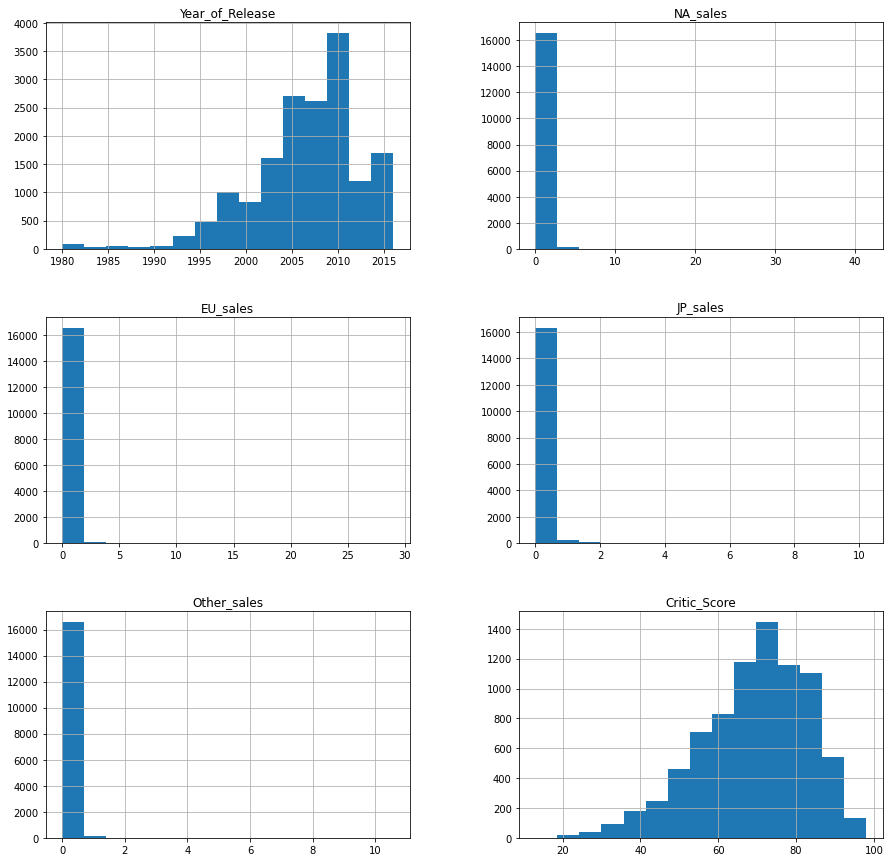

In [ ]:
data.hist(figsize=(15, 15), bins=15);

Гистограммы продаж по странам имеют выдающийся пик и длинный "оторванный хвост", что может говорить о возможных аномалиях и редких выбивающихся значениях в столбцах. Гистограммы года выпуска имеет малые значения вплоть до 90-х г.г., а также пики и провалы далее, но в целом распределение напоминает смещенное влево нормальное, как и распределение оценок критиков. Рассмотрим их все детальнее в соответствующих пунктах.

## Подготовка данных

### Переименование столбцов

In [ ]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование типов

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['year_of_release'].dtypes

Int64Dtype()

In [ ]:
data['critic_score'] = pd.to_numeric(data['critic_score']) / 10
data['critic_score'].dtypes

dtype('float64')

#### Аббревиатура tbd

Посмотрев на уникальные значения столбца с оценками пользователей, помимо пропусков можно увидеть сокращение tbd - To Be Determined, то есть для соответствующих игр ожидается оценка, т.е. по сути это просто пропуск. Посмотрим на количество таких значений и при преобразовании типа этого столбца заменим их на NaN

In [ ]:
display(data['user_score'].unique())
display(data[data['user_score'] == 'tbd']['user_score'].count())
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'].dtypes

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

2424

dtype('float64')

Преобразование типов для столбцов с годом выпуска и оценками критиков и пользователей произведено корректно

### Выявление дубликатов

In [ ]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено; выведем уникальные значения столбцов platform:

In [ ]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Посмотрим на возможные неявные дубликаты, выведя уникальные значения столбца genre:

In [ ]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

Дубликатов по названиям жанров и платформам не обнаружено. Зато имеются пропуски по жанрам. В названии игр могут существовать дубликаты игр, выпущенных в разные годы (или на разных платформах или жанрах); посмотрим на такие, а далее разберемся с пропусками.

In [ ]:
display(data[data[['name', 'platform', 'year_of_release']].duplicated()])
display(data.query('name == "Madden NFL 13" and platform == "PS3" and year_of_release == 2012'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,8.3,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,8.3,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,8.3,5.5,E


От игры с пропущенными названием мы избавимся далее. А две идентичные строки по игре Madden NFL 13, выпущенной в 2012 году на платформе PS3, скорее всего, дополнят друг друга при суммировании, поскольку этот неполный дубликат содержит дополнительные данные по продажам в Европе в столбце eu_sales со значением 0.01. Оставим всё как есть.

Переходим к рассмотрению пропусков.

### Обработка пропусков

In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [ ]:
pd.DataFrame(round(data.isna().mean()*100,2)).style.background_gradient('tab10')

,0
name,0.010000
platform,0.000000
year_of_release,1.610000
genre,0.010000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.320000
user_score,54.590000


Пропуски в столбцах name и genre удалим сразу, их незначительно мало:

In [ ]:
data = data.dropna(subset=['name', 'genre'])

Пропуски оценкам критиков и пользователей заполнять не будем, поскольку заполнение их любым значением (нули, медианы или пр.) может исказить картину в группах, а в действительности эти пропуски могут быть объяснены простым отсутствием информации (в том числе беря во внимание аббревиатуру tbd); будем брать их во внимание при анализе данных. Посмотрим на пропуски года выпуска:

In [ ]:
display(data[data['year_of_release'].isna()]['name'].count())
data[data['year_of_release'].isna()]['name'].unique()

269

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

Годы выпуска некоторых игр можно было бы заполнить исходя из названий соответствующих игр. Как правило, в конце названия может быть указан год выпуска. Выявим строки с такими названиями и заполним для них год выпуска, выведя затем количество оставшихся пропусков:

In [ ]:
#для игр с названием, включающим 4-значный год в конце
for game in data[data['year_of_release'].isna()]['name']:
    if game[-4:].isdigit():
        data.loc[(data['year_of_release'].isna()) & (data['name'] == game),'year_of_release'] = pd.to_numeric(game[-4:])
data[data['year_of_release'].isna()]['name'].count()

254

Удалим все оставшиеся пропуски по году выпуска игр ввиду их малого количества
   
И пропуски по рейтингу ESRB заполним значениями no_rating, чтобы они были учтены в п.4.3

In [ ]:
data = data.dropna(subset=['year_of_release'])
#заполнение пропусков столбца rating маркером
data['rating'] = data['rating'].fillna('no_rating')
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8465
user_score         8987
rating                0
dtype: int64

Оставшиеся пропуски, как уже говорилось выше, удалять не будем, но будем это учитывать в дальнейшем при анализе.

### Суммарные продажи во всех регионах

In [ ]:
#создадим столбец sum_sales для подсчета суммарных продаж во всех регионах
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data['sum_sales'].describe()

count    16459.000000
mean         0.536458
std          1.558837
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: sum_sales, dtype: float64

**Дополнительно: размах значений по продажам**

In [ ]:
(
    data[['sum_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .apply (['count', 'min', 'median', 'max'])
    #.quantile([0.0012, 0.01, .5, .99, .9988])
    .style.format("{:,.2f}")
    )

,sum_sales,na_sales,eu_sales,jp_sales,other_sales
count,"16,459.00","16,459.00","16,459.00","16,459.00","16,459.00"
min,0.00,0.00,0.00,0.00,0.00
median,0.17,0.08,0.02,0.00,0.01
max,82.54,41.36,28.96,10.22,10.57


## Исследовательский анализ данных

### Количество выпущенных игр в разные годы

count    16459.000000
mean      2006.485084
std          5.873422
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

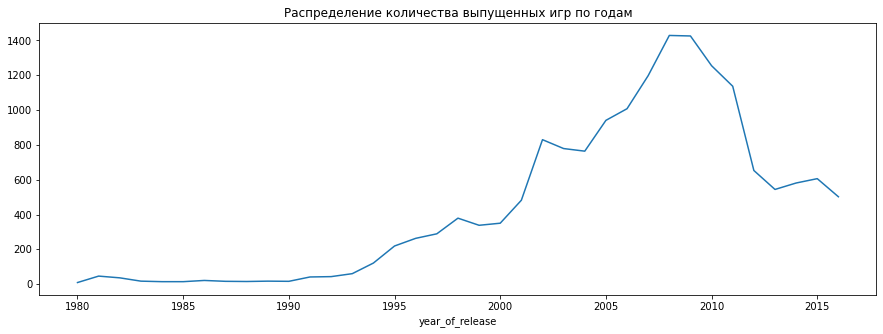

In [ ]:
data.groupby('year_of_release')['name'].count()\
.plot(figsize=(15,5), title='Распределение количества выпущенных игр по годам', x=data['year_of_release'].unique())
data['year_of_release'].describe()

Максимальное количество выпущенных игр пришлось на 2008-2009 г.г. - более 1400 за год.

Распределение на графике напоминает нормальное, смещенное слева, с несколькими пиками (2002, 2008) и провалами (2013). Возможно, это связано с выходом новых платформ и соответственно со скачками количества выпускаемых игр. Рассмотрим это предположение далее, построив гистограммы по разным типам платформ:

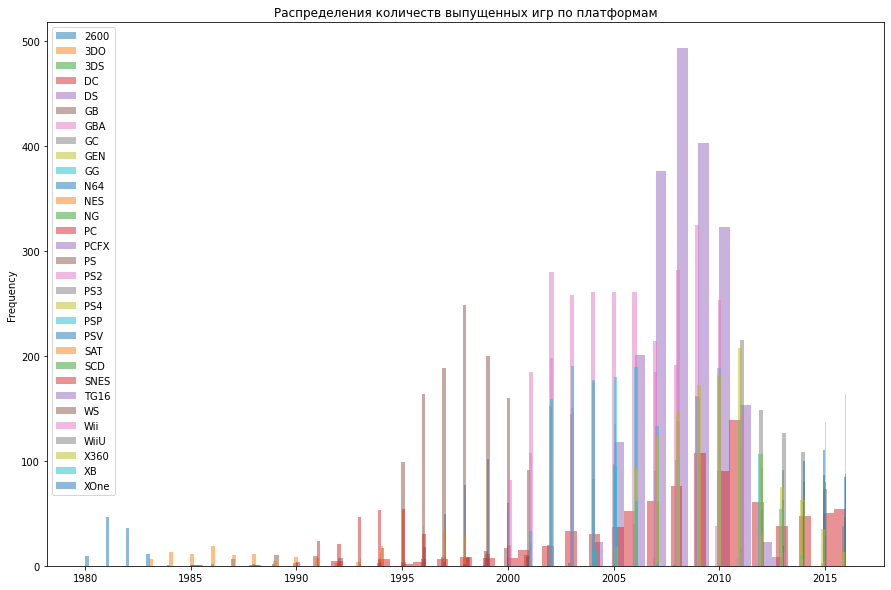

In [ ]:
for p in data['platform'].sort_values().unique():
    data[(data['platform'] == p)]['year_of_release'].plot(
        kind='hist',
        bins=56,
        alpha=0.5,
        label=p,
        legend=True,
        figsize=(15,10),
        title='Распределения количеств выпущенных игр по платформам'
    )

Чисто визуально озвученное выше предположение не опровергается: пики гистограммы количества выпускаемых игр по годам соответствуют пикам гистограмм выпускаемых игр на различных платформах (на графике отличаются цветом) по годам. В самый пиковый 2008 год выпускались игры следующих платформ:

In [ ]:
data.query('year_of_release == 2008')['platform'].unique()

array(['Wii', 'X360', 'PS3', 'DS', 'PSP', 'PS2', 'PC', 'XB', 'DC'],
      dtype=object)

Количество выпускаемых игр до 90-х г.г. на порядок меньше последующего периода. В дальнейшем отсечем ненужные данные, а пока посмотрим изменение количества продаж по платформам.

### Изменение количества продаж по платформам

<AxesSubplot:title={'center':'Распределение количества продаж по платформам, млн проданных копий'}, xlabel='platform'>

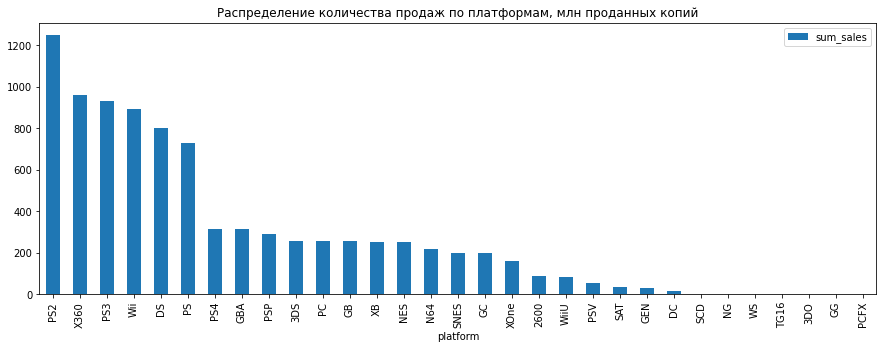

In [ ]:
#построим барплот продаж по платформам
pfs_sort_sales = (
    data[['platform','sum_sales']]
    .pivot_table(index='platform',values='sum_sales',aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)
)
pfs_sort_sales.plot(
        kind='bar',
        figsize=(15,5),
        title='Распределение количества продаж по платформам, млн проданных копий'
    )

Наиболее высокие продажи у платформы PS2 (более 1200 млн проданных копий), за ним идут X360, PS3, Wii, DS и PS (все меньше 1000), затем PS4, GBA, PSP и другие. Вероятно, выход топовых по продажам игр платформ пришелся на более молодой период, посмотрим это на сводной таблице:

In [ ]:
#даты выхода топ платформ
top6_platforms = pfs_sort_sales.head(6).index
(data
 .query('platform in @top6_platforms')
 .pivot_table(index=['platform'], values='year_of_release', aggfunc='min')
 .sort_values(by='year_of_release')
)

,year_of_release
platform,
DS,1985
PS,1994
PS2,2000
X360,2005
PS3,2006
Wii,2006


Все впервые вышедшие на топовых платформах игры зафиксированы не ранее 1985 года. Что мне показалось странным для консоли DS, вышедшей в 2004 году согласно данным Википедии, поэтому выведем ту первую игру и несколько других игр 1985 года:

In [ ]:
display(data.query('platform == "DS" and year_of_release == 1985'))
data.query('year_of_release == 1985').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no_rating,0.02


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
374,Kung Fu,NES,1985,Action,1.64,0.38,1.42,0.06,NaN,NaN,no_rating,3.50
869,Soccer,NES,1985,Sports,0.18,0.23,1.53,0.02,NaN,NaN,no_rating,1.96
1262,Ice Climber,NES,1985,Platform,0.46,0.10,0.92,0.02,NaN,NaN,no_rating,1.50
1482,Gyromite,NES,1985,Puzzle,0.73,0.16,0.40,0.03,NaN,NaN,no_rating,1.32


Скорее всего, тут была некая ошибка при занесении данных. Кампания Nintengo, являющаяся основателем поколения игровых консолей DS, ранее выпускала консоли NES, которые как раз датируются в том числе 1985 годом. Можно исправить эту строку, но мы от нее избавимся в пункте 3.3. Можно заметить, что остальные платформы из топа впервые датируются 1994-м годом.

Посмотрим теперь на распределение продаж по годам на топовых платформах.

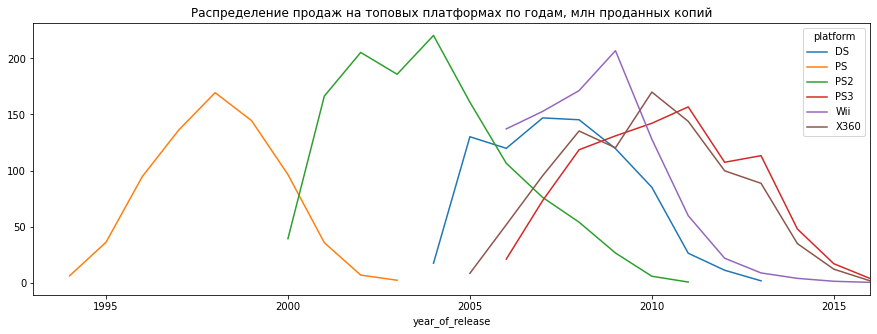

In [ ]:
sales_top_pfs_by_years = (
    data
    .query('platform in @top6_platforms')
    .pivot_table(
        index=['year_of_release'],
        columns='platform',
        values='sum_sales',
        aggfunc='sum')
)
sales_top_pfs_by_years.plot(
    title='Распределение продаж на топовых платформах по годам, млн проданных копий',
    figsize=(15,5))
plt.xlim(1993, 2016)
plt.show()

**Предварительный вывод**

Из графика видно, что распределения продаж в основном напоминают нормальные, но каждое из них приходится на свой период существования платформы с пиком примерно на середине или ближе к началу этого срока. Они накладываются друг на друга, образуя общее распределение. То есть самые популярные платформы сменяют друг друга с некоторой периодичностью. Можно заметить, что и продолжительность существования топовых платформ в среднем в районе 10 лет (что выше среднего по всем платформам, об этом далее). То есть по итогу на этом графике могут быть не учтены те платформы, которые только начинают набирать обороты. Разберем это чуть позже.

И если не брать во внимание выброс по DS в 1985 году, все продажи на топовых платформах действительно начинаются с 1994 года.


Интереса ради посмотрим, как распределено среднее количество копий одной игры по платформам:

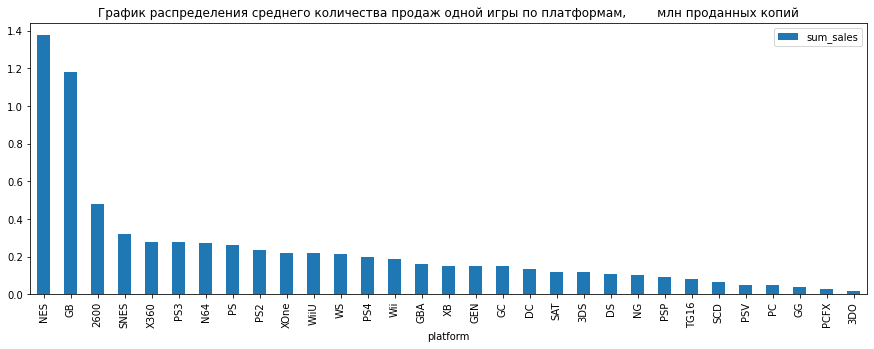

In [ ]:
pfs_sort_sales = (
    data[['platform','sum_sales']]
    .pivot_table(index='platform',values='sum_sales',aggfunc='median')
    .sort_values(by='sum_sales', ascending=False)
    .plot(
        kind='bar',
        figsize=(15,5),
        title='График распределения среднего количества продаж одной игры по платформам,\
        млн проданных копий'
    )
)

Самые продаваемые игры на платформах NES и GB, посмотрим на них:

In [ ]:
display(data[data['platform'] == "NES"].sort_values(by='sum_sales', ascending=False).head(3))
display(data[data['platform'] == "GB"].sort_values(by='sum_sales', ascending=False).head(3))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating,28.31
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,no_rating,17.28


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating,30.26
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,no_rating,23.09


Самыми продаваемыми играми за всё время были игры на NES и DS с названиями Super Mario, Pokemon (в разных интерпретациях), Tetris и Duck Hunt, побив рекорды по продажам свыше 20 млн копий!

#### Продолжительность популярности платформ

Перейдем теперь к рассмотрению вопроса, какова "продолжительность жизни" каждой из платформ датасета. Для этого возьмем срез по соответствующим столбцам, исключив повторы, и посчитаем количество лет, в которых выпускались игры для каждой платформы. Тут же интересно будет посмотреть, как изменялась средняя продолжительность жизни платформы в зависимости от года ее пояления.

,duration,birth_year
platform,,
2600,10,1980
NES,12,1983
DS,11,1985
PC,26,1985
GB,13,1988
SNES,10,1990
GEN,5,1990
GG,1,1992
SCD,2,1993


count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: duration, dtype: float64

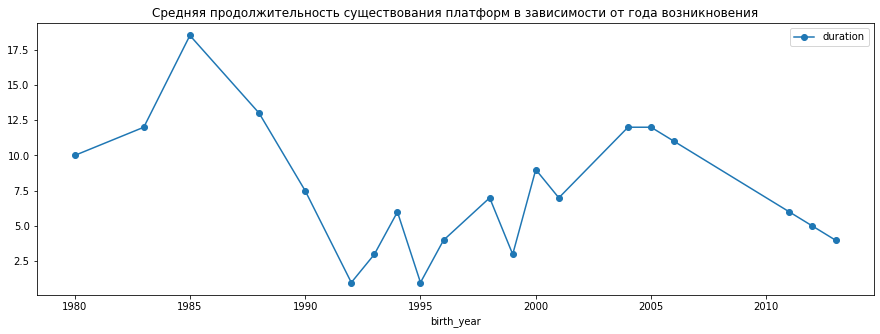

In [ ]:
dur_pf = (
    data[['year_of_release', 'platform']].drop_duplicates()
    .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
).merge(data
       .pivot_table(index=['platform'], values='year_of_release', aggfunc='min')
       ,on='platform',how='left'
      ).sort_values(by='year_of_release_y')
dur_pf.columns = ['duration','birth_year']
display(dur_pf)
display(dur_pf.duration.describe())
dur_pf.groupby('birth_year').median().plot(figsize=(15,5), style='o-',title='Средняя продолжительность существования \
платформ в зависимости от года возникновения')
plt.show()

Как видим из описания получившегося столбца, в среднем продолжительность жизни платформы составляет 7-8 лет. Самый продолжительный срок существования платформы у PC - 26 лет! Явной зависимости продолжительности жизни платформы от года ее появления не обнаружила (с учетом того, что появившиеся в последние годы платформы только начинают приобретать популярность, период 2011-2013 гг вообще нецелесообразно смотреть).

### Актуальный период

Построим "ящик с усами" для столбца с годом выпуска, чтобы отсечь ненужные значения:

<AxesSubplot:>

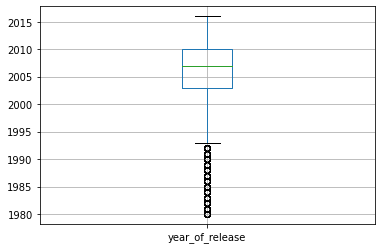

In [ ]:
data.boxplot('year_of_release')

Данные имеют выбросы в столбце до 1994 года. Исходя также и из анализа в предыдущих пунктах, эти данные нецелесообразно использовать при планировании рекламных кампаний на будущий период. Выведем количество таких строк и отсечем их, поскольку далее мы не будем их использовать:

In [ ]:
display(data[data['year_of_release'] < 1994]['year_of_release'].count())
data = data[data['year_of_release'] >= 1994]
data['year_of_release'].describe()

365

count    16094.000000
mean      2006.917174
std          5.137376
min       1994.000000
25%       2003.000000
50%       2008.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Но поскольку мы определили, что средняя продолжительность составляет менее 8 лет, а наибольшую популярность приобретают новые платформы, то для составления прогнозов на 2017 год имеет смысл брать данные хотя бы с 2009 года, т.к. с этого года наблюдается тенденция на снижение продаж устаревающих популярных платформ и, соответственно, выход новых. Также нам известно, что 2016 год может быть неполным, поэтому отсечем и его. Будем в дальнейшем использовать актуальный период при анализе:

In [ ]:
data_new = data[(data['year_of_release'] >= 2009) & (data['year_of_release'] < 2016)]
data_new['platform'].unique()

array(['Wii', 'X360', 'PS3', 'DS', 'PS4', '3DS', 'PC', 'XOne', 'WiiU',
       'PSP', 'PS2', 'PSV'], dtype=object)


В качестве актуального периода возьмем три последних года, т.е. с 2014 по 2016 включительно, и далее будем рассматривать только его. Все дальнейшие выводы также подвержены корректировке с учетом этого изменения:</div>

In [ ]:
data_new = data[data['year_of_release'] >= 2014]
data_new['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

### Лидеры продаж, потенциально прибыльные платформы

Как уже отмечалось выше, безусловно среди всего набора данных выделяется лидер продаж игр - это платформ PS2, но пик ее популярности приходился на 2004 год, а к началу 2012 продажи снизились до нуля. Поэтому в рассмотрении должны участовать новые платформы. Для этого рассмотрим новый период более внимательно.

<AxesSubplot:title={'center':'График распределения количества продаж по платформам с 2014 г., млн проданных копий'}, xlabel='platform'>

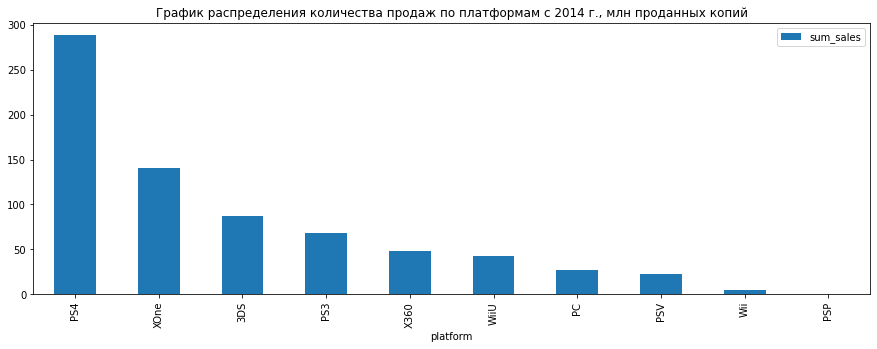

In [ ]:
(
    data_new[['platform','sum_sales']]
    .pivot_table(index='platform',values='sum_sales',aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)
    .plot(
        kind='bar',
        figsize=(15,5),
        title='График распределения количества продаж по платформам с 2014 г., млн проданных копий'
    )
)

Из этого графика видны лидеры продаж PS4, XOne, 3DS и другие. Несмотря на то, что платформа PC не входила в десятку платформ самых продаваемых игр, она продолжает держаться "на плаву" и попадает в этот список после 2014 года. Посмотрим на суммарные продажи этих платформ:

<AxesSubplot:title={'center':'Распределение продаж на платформах в 2014-2015 гг, млн проданных копий'}, xlabel='year_of_release'>

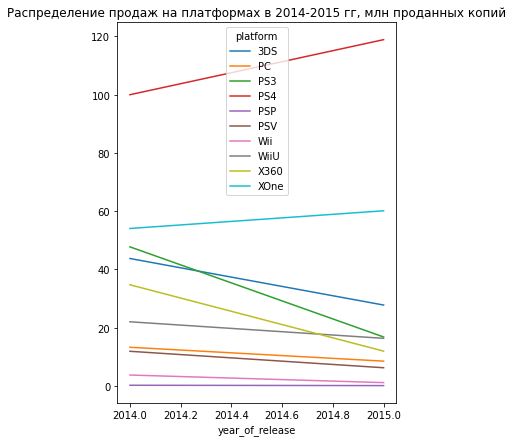

In [ ]:
(
    data_new
    .query('year_of_release != 2016')
    .pivot_table(
        index=['year_of_release'],
        columns='platform',
        values='sum_sales',
        aggfunc='sum')
    .plot(
#    kind='bar',
    title='Распределение продаж на платформах в 2014-2015 гг, млн проданных копий',
    figsize=(5,7)
    )
)

На общем графике распределения явно видны хотя бы две платформы, имеющие рост в 2014 и 2015 гг (2016 год содержит неполную информацию, поэтому для всех платформ характерен спад на графике в этот год и мы его не выводим здесь). Выведем для наглядности их отдельно:

<AxesSubplot:title={'center':'Распределение суммарных продаж на PS4 и XOne по годам, млн проданных копий'}, xlabel='year_of_release'>

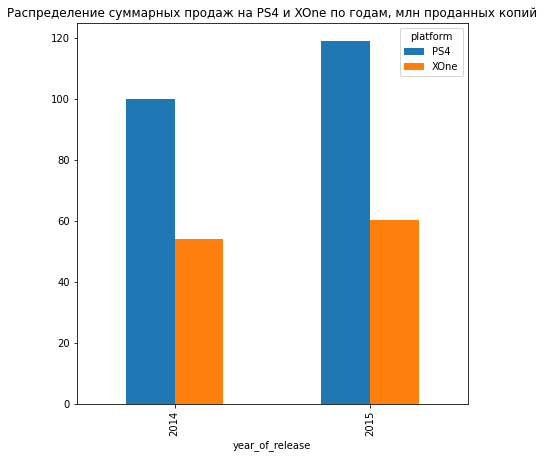

In [ ]:
(
    data_new
    .query('year_of_release != 2016')
    .query('platform == "PS4" or platform == "XOne"')
    .pivot_table(
        index=['year_of_release'],
        columns='platform',
        values='sum_sales',
        aggfunc='sum')
    .plot(
    title='Распределение суммарных продаж на PS4 и XOne по годам, млн проданных копий',
    kind='bar',
    figsize=(7,7)
    )
)

PS4 и XOne считаем за потенциально прибыльные платформы. У остальных платформ наблюдается спад в продажах или невысокий уровень продаж.

### Глобальные продажи игр в разбивке по платформам

Выведем топ-10 платформ с наибольшими суммарными продажами по всем играм в течение актуального периода:

In [ ]:
top_new_platforms = (
    data_new
    .pivot_table(
        index=['platform'],
        values='sum_sales',
        aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)
    .head(10)
)
top_new_platforms

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Теперь для каждой топовой платформы выведем "ящик с усами":

Text(0, 0.5, 'Топ платформ')

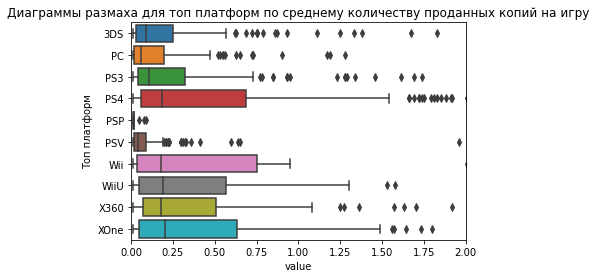

In [ ]:
sales_pfs_by_years_new = pd.melt(
    data_new
    .query('platform in @top_new_platforms.index')
    .pivot_table(
        index=['name'],
        columns=['platform'],
        values='sum_sales',
        aggfunc='mean')
).dropna(subset=['value'])
(sns
 .boxplot(
    y='platform',
    x='value',
    data=sales_pfs_by_years_new)
 .set(title='Диаграммы размаха для топ платформ по среднему количеству проданных копий на игру'))
plt.xlim(0,2)
plt.ylabel('Топ платформ')

Как видно из диаграмм "ящиков с усами", у всех из рассматриваемых платформ есть выбросы при том, что основная масса игр продавалась в количестве копий, не доходившем до 2 млн. То есть у представленных платформах есть особо популярные игры, копии которых расходились до 30 млн и более (платформа Wii).

Самая высокая медиана продаж копий на игру у PS4 и XOne, также нормальные значения для них самые высокие (в частности, правый ус для PS4 самый "длинный"), т.е. можно сказать, что это самые прибыльные платформы, подтверждая выводы предыдущего пункта.

### Влияние отзывов покупателей и критиков на продажи внутри одной популярной платформы

Для платформы PS4 рассмотрим влияние отзывов покупателей и критиков на продажи внутри нее.

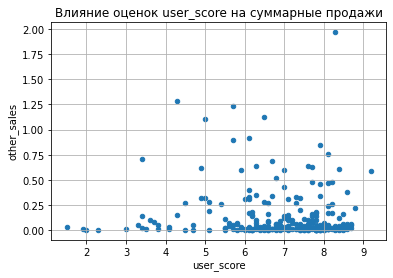

'Коэффициент корреляции Пирсона -0.04416631317654579'

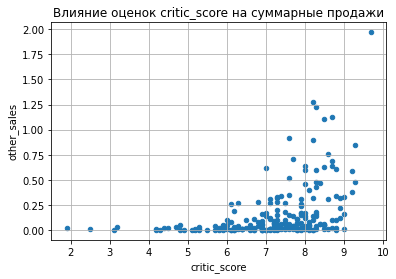

'Коэффициент корреляции Пирсона 0.4046445871171014'

In [ ]:
#выборка данных по PS4
pop_pf = data_new.query('platform == "PS4"')
for score in ['user_score','critic_score']:
    #диаграмма рассеяния
    pop_pf.plot(
        x=score,
        y='other_sales',
        kind='scatter',
        grid=True,
        title='Влияние оценок '+score+' на суммарные продажи')
    plt.show()
    #коэффициент корреляции
    display('Коэффициент корреляции Пирсона '+str(pop_pf['other_sales'].corr(pop_pf[score])))

Как видно из диаграмм рассеяния и коэффициентов корреляции, пользовательские оценки почти не влияют на суммарные продажи, при этом оценки критиков имеют бОльший вес при покупке игр. Некоторые игры при низких оценках имеют вполне высокие продажи.

#### Влияние отзывов на других платформах

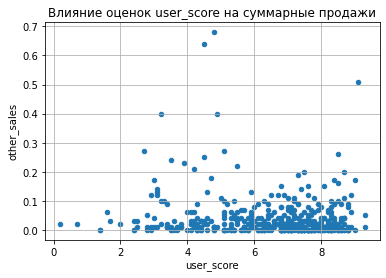

'Коэффициент корреляции Пирсона -0.10932419569872374'

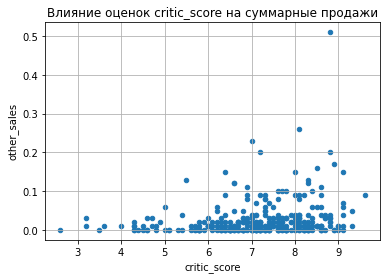

'Коэффициент корреляции Пирсона 0.20851029636906113'

In [ ]:
#выборка данных в непопулярных платформах
pop_pf = data_new.query('platform not in ["PS4","XOne"]')
for score in ['user_score','critic_score']:
    #диаграмма рассеяния
    pop_pf.plot(
        x=score,
        y='other_sales',
        kind='scatter',
        grid=True,
        title='Влияние оценок '+score+' на суммарные продажи')
    plt.show()
    #коэффициент корреляции
    display('Коэффициент корреляции Пирсона '+str(pop_pf['other_sales'].corr(pop_pf[score])))

Ситуация на других платформах такова, что влияние оценок пользователей и критиков тоже очень мало (линейная зависимость от оценок пользователей и критиков около нуля).

В целом получается, что покупатели чаще смотрят на отзывы критиков, чем на оценки пользователей, причем это верно скорее для популярных платформ (выбор покупателями игр непопулярных платформ линейно не зависит от оценок), что не противоречит здравому смыслу.

### Распределение игр по жанрам

Будем рассматривать распределения общего количества продаж, общего количества игр и, соответственно, среднюю популярность игр каждого жанра (среднее количество проданных копий на игру). Для этого для удобства напишем функцию построения barplot-а:

In [ ]:
def barplot_genre(func):
    dict_func = {'sum':'общего количества продаж ',\
                 'count':'общего количества игр ',\
                 'mean':'среднего количества продаж на одну игру '}
    (
        data_new[['genre','sum_sales']]
        .pivot_table(index='genre',values='sum_sales',aggfunc=func)
        .sort_values(by='sum_sales', ascending=False)
        .plot(
            kind='bar',
            figsize=(15,5),
            title='График распределения '+dict_func.get(func)+'по жанрам с 2014 года, млн'
    )
)

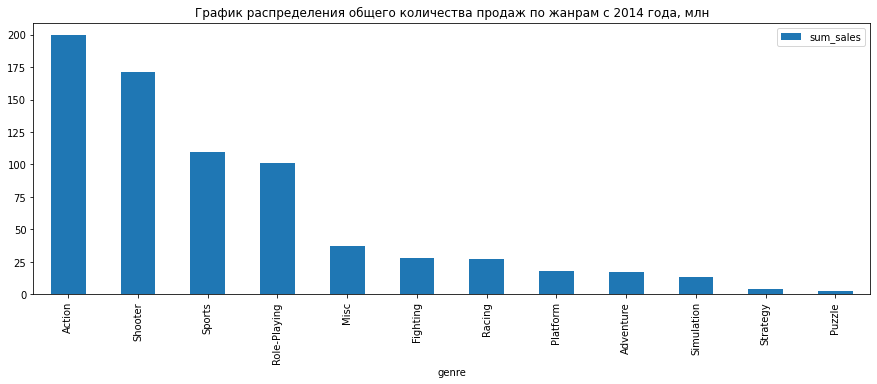

In [ ]:
barplot_genre('sum')

Самые продаваемые жанры - это Action, Shooter, а также Sports и Role-Playing. С конца рейтинга как самые непродаваемые оказались по возрастающей Puzzle, Strategy.

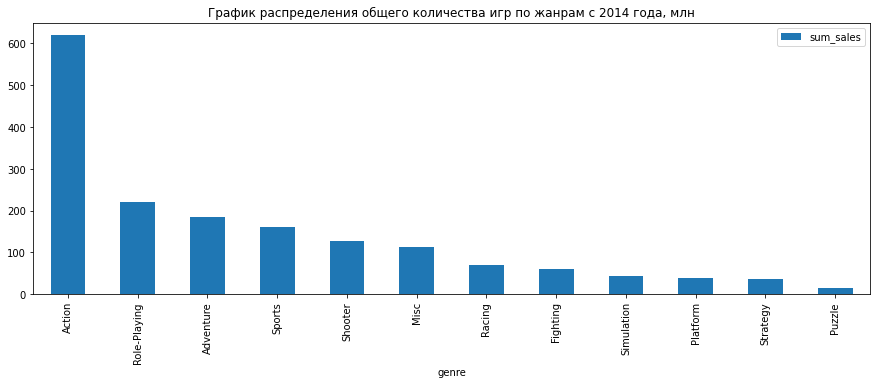

In [ ]:
barplot_genre('count')

Самое большое количество выпущенных игр с 2005 года в жанрах Action, далее Role-Playing, Adventure, Sports и др. Меньше всего Puzzle, Strategy.

И теперь посмотрим, сколько проданных копий приходилось в среднем на одну игру каждого жанра:

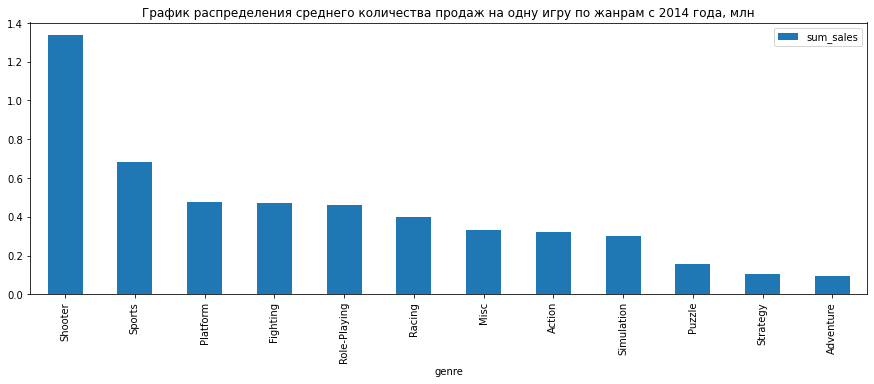

In [ ]:
barplot_genre('mean')

В среднем по количеству проданных копий на игру самыми популярными остаются игры жанра Shooter (при достаточно высоком количестве выпущенных игр высокий показатель продаж), Sports (достаточно высокие продажи при среднем многообразии игр), за ним следом Platform (при малом количестве выпущенных игр чуть сниженное количество суммарных продаж, но неплохой показатель продаваемости за игру) и т.д. Role-Playing при хорошем многообразии игр и неплохих продажах все же в "середнячках" в продаваемости копий за игру. Лидер по количеству игр жанр Action при высоких показателях выпуска игр имеет и высокое количество продаж на игру, но что объясняет и среднее количество проданных копий за игру. Самые непопулярные среди данных жанров по возрастающей Adventure и Strategy (фигурирущий в лидерах по количеству выпущенных игр жанр Adventure действительно имеет невысокие продажи)

## Портрет пользователя каждого региона

Будем рассматривать топы для трех регионов и трех столбцов. Для этого напишем функцию, принимающуюю в качестве аргумента столбец для анализа.

In [ ]:
dict_countries = {'na_sales':'в Северной Америке','eu_sales':'в Европе','jp_sales':'в Японии'}
def plot_top(col):
    dict_columns = {'platform':'платформ ', 'genre':'жанров ', 'rating':'значений рейтингов '}
    for country in dict_countries:
        country_sales = data_new.pivot_table(
            index=col,
            values=country,
            aggfunc='sum'
        )
        country_sales.columns = ['sales']
        (country_sales
         .sort_values(by='sales',ascending=False)
         .head()
         .plot(
             kind='bar',
             y="sales",
             legend=False,
             title="Топ-5 популярных "+dict_columns.get(col)+dict_countries.get(country),
             figsize=(5, 5)
         ))

### Топы-5 самых популярных платформ по трем регионам

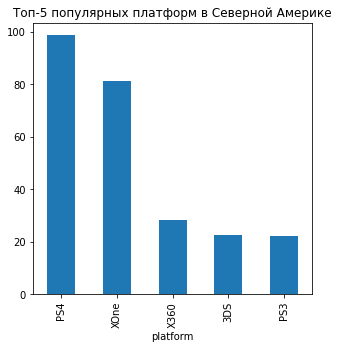

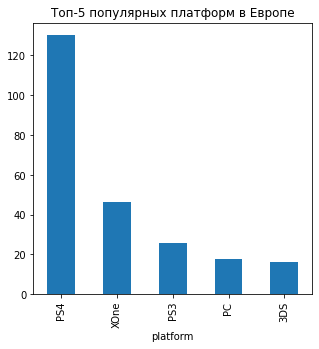

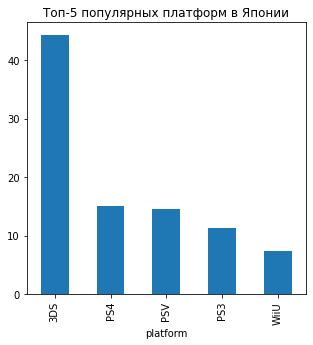

In [ ]:
plot_top('platform')

В Северной Америке в 2014-2016 гг наибольшей популярностью пользуются платформы PS4, XOne, X360, 3DS и PS3.
Для Европы характерно следующее распределение по убыванию популярности платформ: PS4, XOne, PS3, PC, 3DS (почти все те же участники на разных местах).
Для Японии самой популярной является 3DS, затем PS4, PSV, PS3, WiiU.

Среди всех топов стоит выделить PS4 (безоговорочный лидер для США и Европы, второе место в Японии); также можно выделить PS3 (с 2009 года пока остающийся в топ-5 всех трех регионах) и 3DS (лидер топа в Японии, появляющийся на последних местах топа Европы и США); в Европе еще отдают предпочтение PC. Для Японии характерны свои "любимчики": PSV и WiiU, не входящие в топы других двух регионов, зато здесь пока не пользуется популярностью XOne, которая популярна в Европе и Сев.Америке (почетное второе место).


### Топы-5 самых популярных жанров

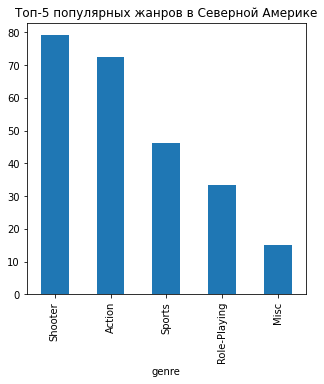

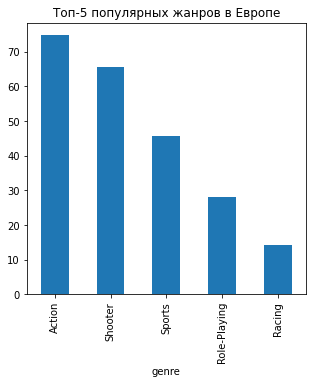

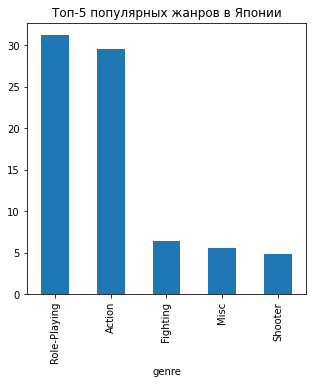

In [ ]:
plot_top('genre')

В Северной Америке наибольшей популярностью пользуются жанры Shooter, Action, Sports, Role-Playing и Misc.
Для Европы топ идентичен, кроме пятого места: там предпочитают Racing.
Для Японии самым популярным является жанр Role-Playing, затем Action, Fighting, Misc, Shooter.

Япония и здесь отличается самобытностью: особо популярный в Европе и США жанр Shooter здесь на пятом месте, популярнее его у них Fighting и Misc.

Action популярен во всех трех регионах.

### Влияние рейтинга ESRB на продажи в одном регионе

По данным Википедии, существуют следующие значения рейтинга ESRB:

* «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone»
* «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым.
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
* «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
* «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.
* «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу
* «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант

Можем посмотреть распределения рейтингов сразу для всех трех регионов.

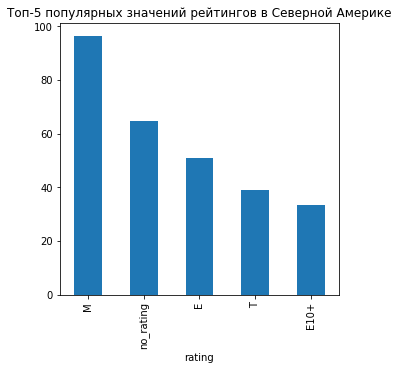

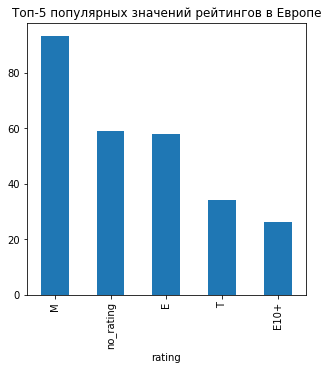

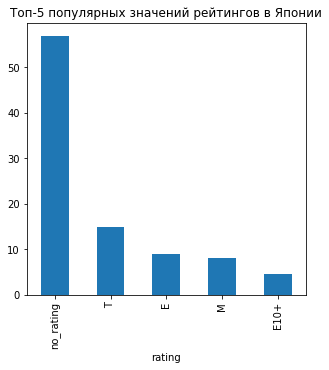

In [ ]:
plot_top('rating')

Популярность игр по рейтинговым категориям:

* E - для всех
* T - подросткам
* M - для взрослых
* E10+ - для всех старше 10 лет
* no_rating - рейтинг не присвоен.

Идентичны распределения рейтинговых оценок в Северной Америке и Европе: M (для взрослых), E (для всех), T (для подростков), E10+ (всем старше 10 лет), продажи игр без рейтинга высоки и находится на втором месте. Несколько другое распределение мест в Японии: по данным с 2014 по 2016 гг популярными там являются игры категории T для подростков, затем E игры для всех, M для взрослых и игры для детей. Но самые высокие продажи здесь показывают игры без категории. Посчитаем доли продаж игр с пропусками в категориях рейтинга ESRB:


In [ ]:
print('Доля игр, не имеющих категорию по рейтингу ESRB:')
for country in dict_countries:
    country_sales = data_new.pivot_table(
        index='rating',
        values=country,
        aggfunc=['sum']
    )
    country_sales.columns = ['sales']
    country_sales = (country_sales
     .sort_values(by='sales',ascending=False)
    )
    print(str(round(country_sales[country_sales.index == 'no_rating']['sales'].sum()/\
                    country_sales['sales'].sum(),2))+' - '+dict_countries.get(country))

Доля игр, не имеющих категорию по рейтингу ESRB:
0.23 - в Северной Америке
0.22 - в Европе
0.61 - в Японии


Теперь мы рассмотрели данные без пропусков и пришли к выводу, что больше половины продаваемых игр в Японии не имеют рейтинга ESRB. Это в свою очередь говорит о том, что данная система не пользуется популярностью в пределах данного региона. В странах Европы и Северной Америки доля пропусков по категории рейтинга ESRB значительно меньше, что может быть объяснено бОльшим влиянием этой системы, чем в Японии. Это всё коррелирует со здравым смыслом, поскольку "в разных странах представлены разные рейтинговые модели: американская ESRB, европейская PEGI, японская CERO" (интернет-источник, сайт kanobu.ru).

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

За нулевую гипотезу принимаем утверждение, что пользовательские рейтинги платформ Xbox One и PC одинаковые. Соответственно, за альтернативную гипотезу берем обратное утверждение, что данные рейтинги различаются. Т.е.:

* H0 = "рейтинг пользователя платформы XOne == рейтинг пользователя платформы PC"
* H1 = "рейтинг пользователя платформы XOne != рейтинг пользователя платформы PC"

Статистический порог значимости берем 5%. Данные измеряются тысячами записей, но имеется большое количество пропусков.

В качестве теста возьмем ttest_ind с параметром equal=False, поскольку нам нужно сравнить две генеральные совокупности с возможно различными значениями дисперсии.

In [ ]:
sample1 = data_new[data_new['platform'] == "XOne"]['user_score'].dropna()
sample2 = data_new[data_new['platform'] == "PC"]['user_score'].dropna()
results = st.ttest_ind(sample1, sample2, equal_var = False)
alpha = .05
display(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

0.11601398086668832

Не отвергаем нулевую гипотезу


Поскольку выборки достаточно невелики, можно просто посмотреть на средние значения обеих совокупностей и сравнить их:

In [ ]:
print(sample1.describe())
print(sample2.describe())

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64
count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64


Получается, отвергнуть нулевую гипотезу не удалось, т.е. считаем средние пользовательские рейтинги платформ XOne и PC одинаковыми с вероятностью ошибки 5%.

### Средние пользовательские рейтинги жанров Action и Sports разные

За нулевую гипотезу принимаем утверждение, что пользовательские рейтинги жанров Action и Sports одинаковые. Соответственно, за альтернативную гипотезу берем обратное утверждение, что данные рейтинги различаются. Т.е.:

* H0 = "рейтинг пользователя жанра Action == рейтинг пользователя жанра Sports"
* H1 = "рейтинг пользователя жанра Action != рейтинг пользователя жанра Sports"

Статистический порог значимости берем 5%. Данные измеряются тысячами записей, но имеется большое количество пропусков.

В качестве теста возьмем ttest_ind с параметром equal=False, поскольку нам нужно сравнить две генеральные совокупности с возможно различными значениями дисперсии.

In [ ]:
sample1 = data_new[data_new['genre'] == "Action"]['user_score'].dropna()
sample2 = data_new[data_new['genre'] == "Sports"]['user_score'].dropna()
results = st.ttest_ind(sample1, sample2, equal_var = False)
alpha = .05
display(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

1.1825550382644557e-14

Отвергаем нулевую гипотезу


In [ ]:
print(sample1.describe())
print(sample2.describe())

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64
count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64


Получается, отвергнуть нулевую гипотезу удалось, т.е. считаем средние пользовательские рейтинги жанров Action и Sports разными с вероятностью ошибки 5%

## Общий вывод

В ходе работы были выполнены следующие шаги:

   Изучены общая информация по данным, произведена подготовка данных, в том числе:

        * замена названий столбцов
        * выявление неполных дубликатов в играх по сумме ключевых параметров: наименование, платформа, год выпуска (одна единственная запись, оставила без изменений)
        * преобразование данных в нужные типы
        * обработка пропусков (частично восстановлены пропуски в годах выпуска, остальные удалены наряду с пропусками в названиях и жанрах, пропуски по оценкам оставили без изменений, а по рейтингу маркировали значением "no_rating", чтобы в дальнейшем учитывать их в анализе п.4.3)
        * подсчет суммарных продаж во всех регионах

   Помимо этого при анализе была выявлена ошибка по игре 1985 года, относящейся к другой платформе этого периода. Была удалена при фильтрации.

   Также был проведен исследовательский анализ данных, были изучены и выявлены следующие закономерности.

        * количество выпущенных игр в разные годы
        * изменение продаж по платформам

   Распределение выпущенных по всем платформам игр за всё время определяется популярностью платформ на данном отрезке времени. Пиковые годы по продажам игр - 2008-09, когда наложились выпуски игр популярных платформ того времени. В целом, и продажи по платформам распределяются таким образом, что пики популярности одних платформ сменяются другими, более современными. Однако замечено, что платформа PC остается "на плаву" и в последние годы  

        * актуальный период для прогноза на 2017 год и неактуальные годы

   Средняя продолжительность существования платформы менее 8 лет (но есть 26-летний "долгожитель" - PC).

   Имеет смысл рассматривать данные не за всё время и не с 1994 года (начало существенных продаж), а с 2014 (чтобы зафиксировать именно самые свежие тенденции)
   
           * лидеры продаж (роста или падения) среди платформ

   Потенциально прибыльными платформами считаю PS4 и XBox One, остальные морально устарели или имеют не такой высокий уровень продаж.

        * глобальные продажи игр в разбивке по платформам

   Основная масса игр на популярных платформах продаются в пределах 2 млн копий за игру, но "выстреливают" отдельные игры, приносящие доход в разы, а то и десятки раз больше. Самый большой доход в последние годы у лидеров продаж PS4 и XBoxOne

        * влияние отзывов покупателей и критиков на продажи внутри одной популярной платформы
        * выводы по продажам на других платформах

   Отзывы пользователей на продажи почти не влияют, отзывы критиков имеют небольшое влияние на популярных платформах.

        * распределение игр по жанрам

   Самым популярным жанром считаю Shooter (много игр, высокие продажи и самый высокий средний показатель проданных копий за игру). С отрывом от лидера  идет следом жанр Sports - больше игр, чем у Shooter, но меньше продаж. Лидер по количеству выпущенных игр и суммарным продажам жанр Action, однако, показывает невысокое количество проданных копий за игру.
    
   Были составлены портреты пользователя каждого региона в разрезе платформ, жанров и рейтинговых категорий. Тут можно заключить следующее.

   Стоит заметить, что жанр Action и платформа PS4 популярны во всех рассматриваемых регионах. Портреты пользователей Европы и Северной Америки очень похожи, Япония более самобытна в отношении предпочтений по предложенным группам игр: наряду с популярностью Action для неё более характерны игры жанров Role-Playing на платформах 3DS и PS4. Для жителей Северной Америки и Европы наиболее предпочтительны платформы PS4 и XOne жанров Action и Shooter возрастных категорий "для взрослых". Рейтинг же ESRB не оказывает сильного влияния на выбор игр в Японии, вероятно, из-за наличия у них собственной системы рейтинга.
    
   Далее была проведена проверка гипотез и получены следующие выводы:

    * средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    * средние пользовательские рейтинги жанров Action и Sports разные

    
   Дополнительно: самыми продаваемыми играми за всё время были игры платформ NES и DS, это игры Super Mario (более 40 млн копий), Pokemon (в разных интерпретациях), Tetris (более 30 млн копий), Duck Hunt (более 28 млн копий).